<a href="https://colab.research.google.com/github/paruldiwakar/ML-DL/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.layers import *
from keras.models import *
from keras.optimizers import Adam
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
(X_train,_),(_,_) = mnist.load_data()

In [0]:
print(X_train.shape)

(60000, 28, 28)


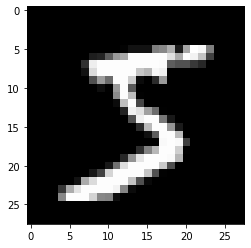

In [0]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [0]:
# Normalise data in range [-1,1]

# All the pixel values are in the range from 0-255 so converting it into float 32
# 127.5 is the middlemost pixel value ,taking median instead of mean
X_train = (X_train.astype('float32')-127.5)/127.5 
print(np.max(X_train),np.min(X_train))

print(X_train.shape)

1.0 -1.0
(60000, 28, 28)


In [0]:
Total_epochs = 50
Batch_size = 256
No_of_batches = int(X_train.shape[0]/Batch_size) # 60000/256
Half_batch = 128

# 128 WILL BE FAKE + 128 WILL BE REAL = 256 (TO THE DISCRIMNATOR)

Noise_dim = 100 # It will upsampled to 784 dims vector
adam = Adam(lr=2e-4,beta_1=0.5)

In [0]:
# GENERATOR
# Input Noise (100 dims) & Output a vector(784 dims)

generator = Sequential()
generator.add(Dense(256,input_shape=(Noise_dim,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_____________________

In [0]:

# DISCRIMINATOR , downsampling

discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)

discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
# GAN 

discriminator.trainable = False
gan_input = Input(shape=(Noise_dim,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

# FUNCTIONAL API  
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)


In [0]:
X_train = X_train.reshape(-1,784)
X_train.shape

(60000, 784)

In [0]:
def show_imgs(epoch):
  
    noise = np.random.normal(0,1,size=(100,Noise_dim))
    fake_imgs = generator.predict(noise)
    fake_imgs = fake_imgs.reshape(100,28,28)

    # Plot
    plt.figure(figsize=(10,10))
    for i in range(100):
        plt.subplot(10,10,i+1)
        plt.imshow(fake_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")

    plt.tight_layout()
    plt.savefig('images/gan_output_{0}.png'.format(epoch+1))

In [0]:
import os
if not os.path.isdir("images"):
  os.mkdir("images")

if not os.path.isdir("model"):
  os.mkdir("model")  

!ls  

images	model  sample_data


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch : 1 Disc Loss 0.6482 Gen Loss 0.9744
Epoch : 2 Disc Loss 0.6264 Gen Loss 1.0921
Epoch : 3 Disc Loss 0.6364 Gen Loss 1.1399
Epoch : 4 Disc Loss 0.6214 Gen Loss 1.1605
Epoch : 5 Disc Loss 0.5934 Gen Loss 1.2485
Epoch : 6 Disc Loss 0.5768 Gen Loss 1.3183
Epoch : 7 Disc Loss 0.5645 Gen Loss 1.3662
Epoch : 8 Disc Loss 0.5526 Gen Loss 1.3821
Epoch : 9 Disc Loss 0.5657 Gen Loss 1.3343
Epoch : 10 Disc Loss 0.5836 Gen Loss 1.2634
Epoch : 11 Disc Loss 0.5998 Gen Loss 1.2057
Epoch : 12 Disc Loss 0.6085 Gen Loss 1.1759
Epoch : 13 Disc Loss 0.6203 Gen Loss 1.1069
Epoch : 14 Disc Loss 0.6149 Gen Loss 1.1465
Epoch : 15 Disc Loss 0.6278 Gen Loss 1.1059
Epoch : 16 Disc Loss 0.6350 Gen Loss 1.0739
Epoch : 17 Disc Loss 0.6377 Gen Loss 1.0718
Epoch : 18 Disc Loss 0.6371 Gen Loss 1.0776
Epoch : 19 Disc Loss 0.6351 Gen Loss 1.0739
Epoch : 20 Disc Loss 0.6408 Gen Loss 1.0498
Epoch : 21 Disc Loss 0.6427 Gen Loss 1.0543
Epoch : 22 Disc Loss 0.6455 Gen Loss 1.0488
Epoch : 23 Disc Loss 0.6452 Gen Loss 1.05

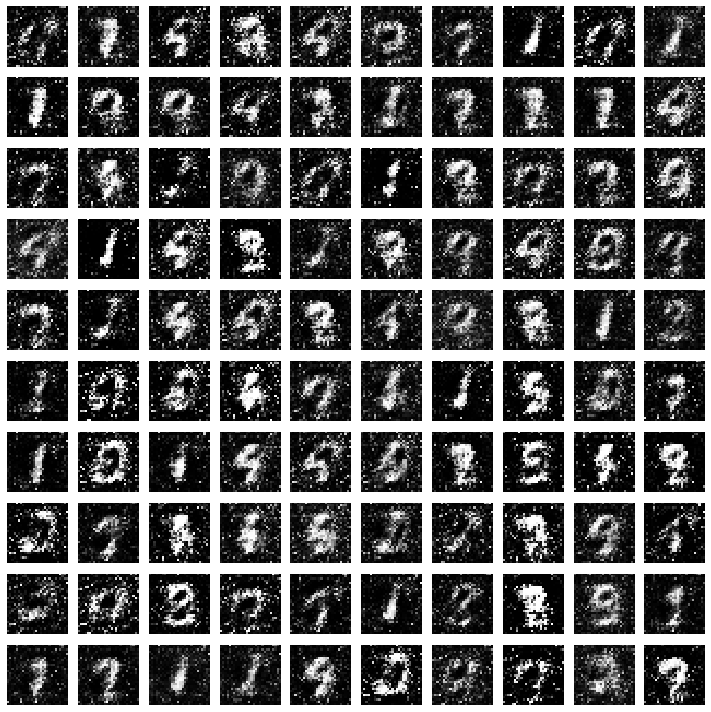

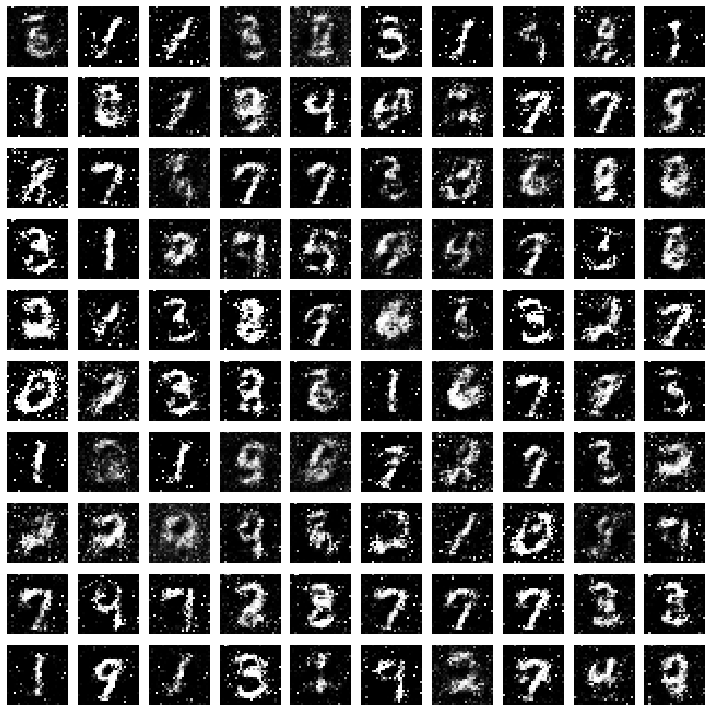

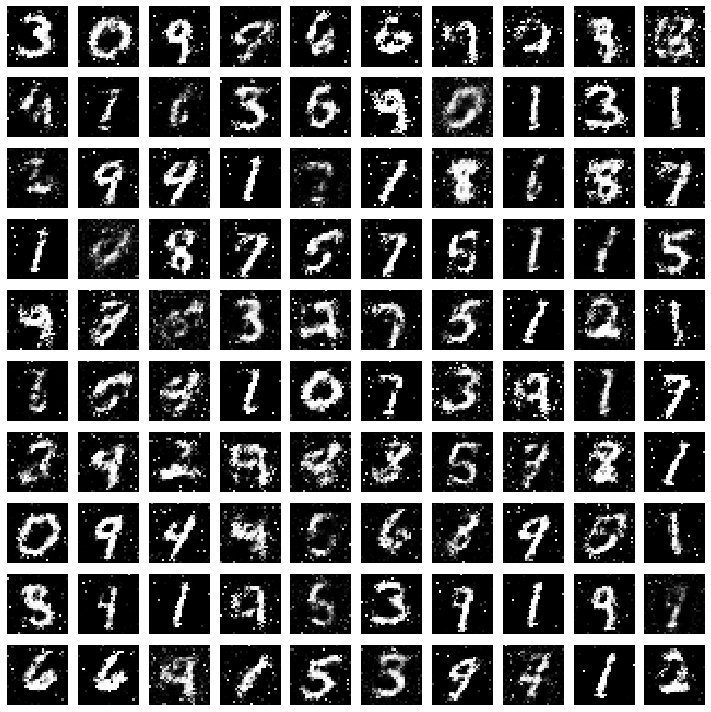

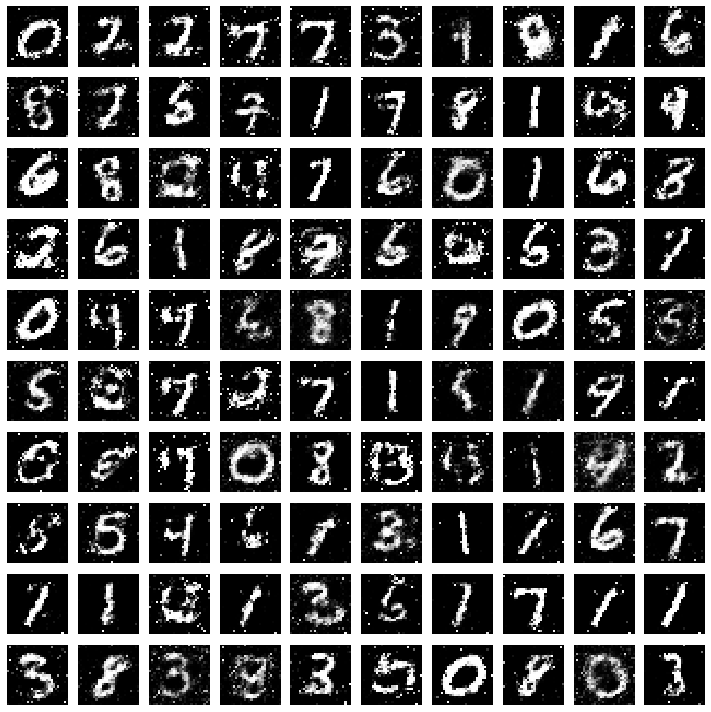

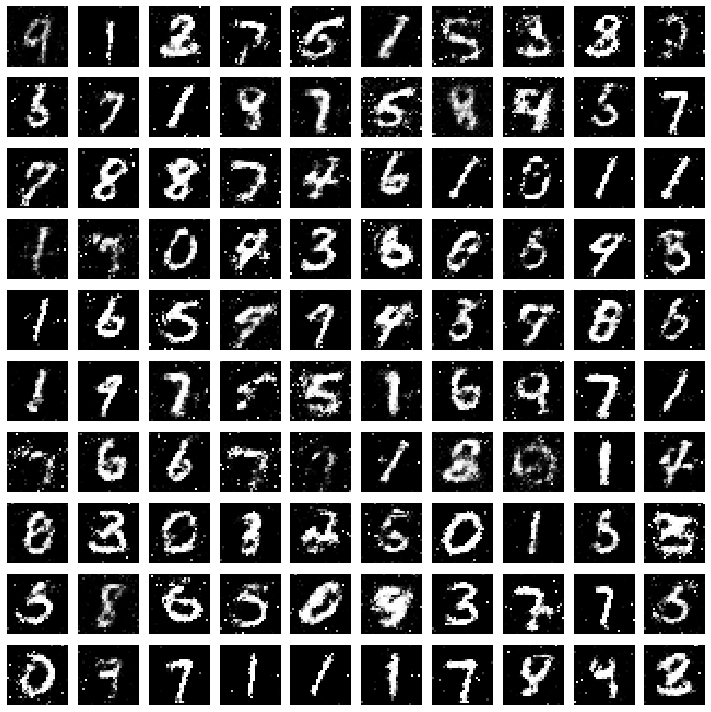

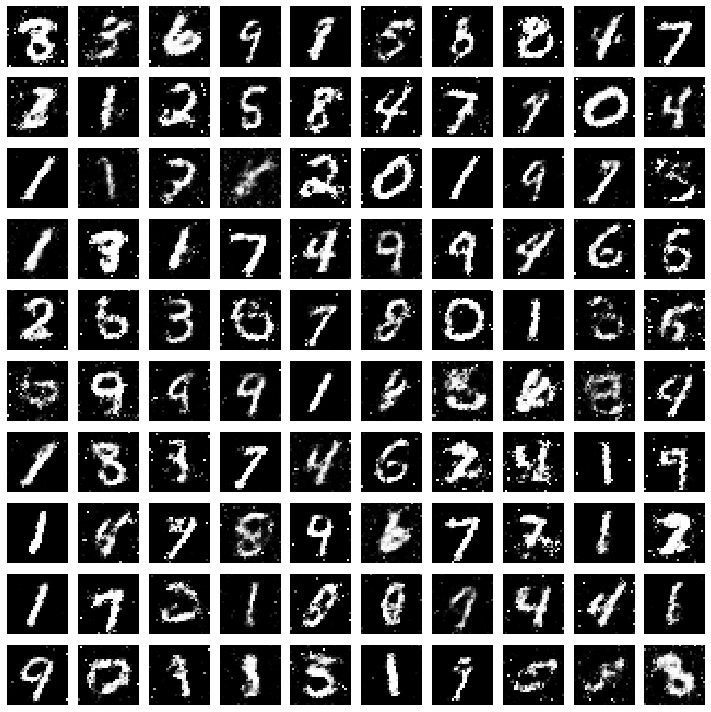

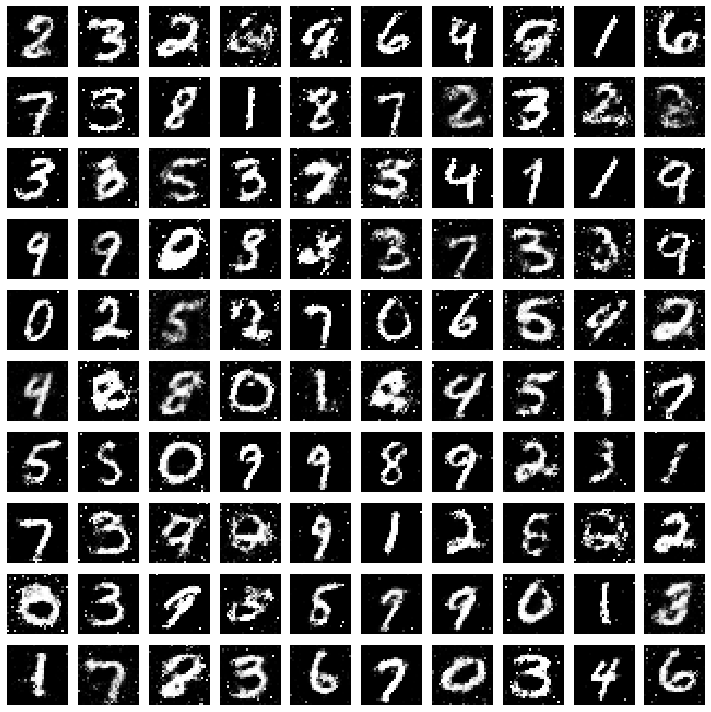

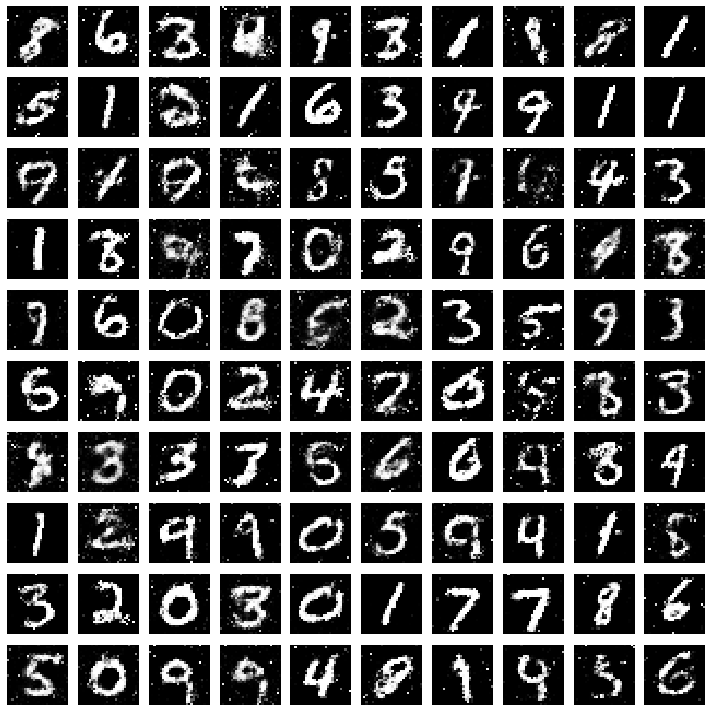

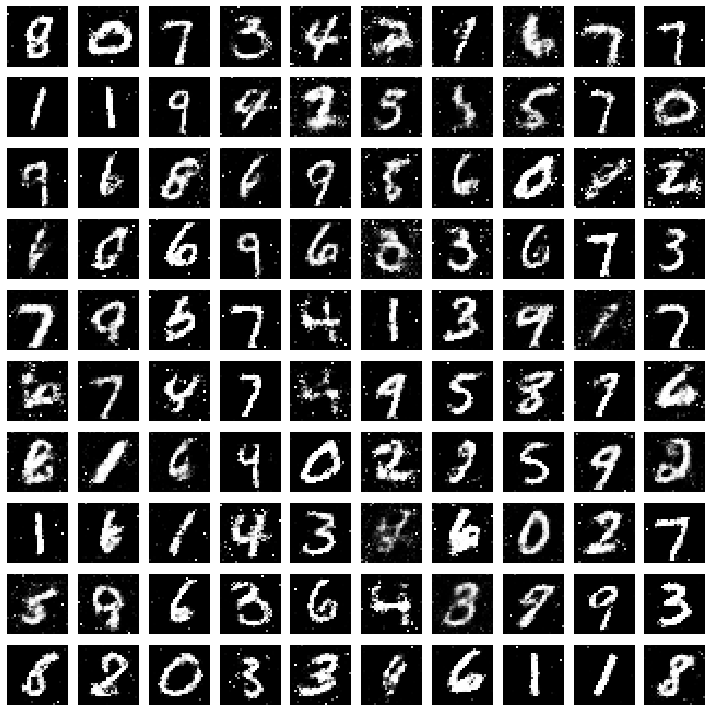

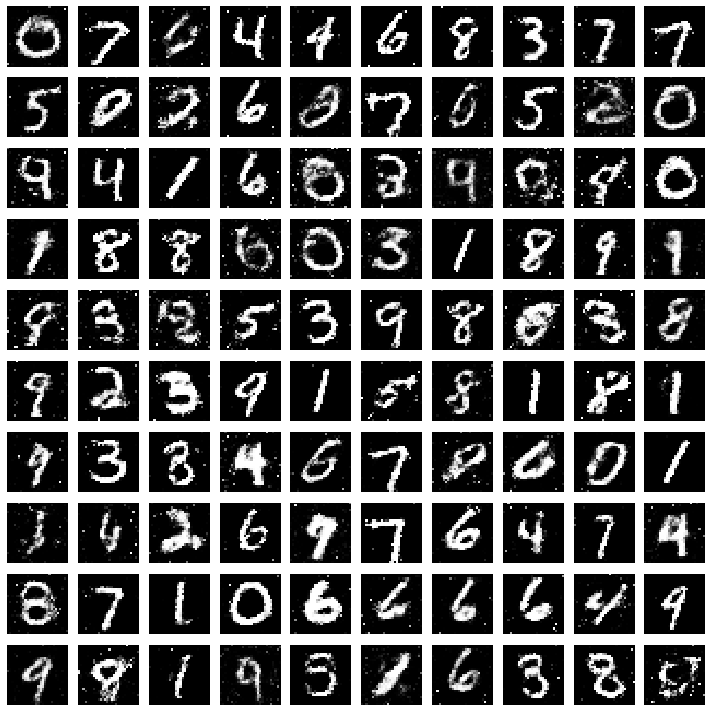

In [0]:
# Training Loop
d_losses = []
g_losses = []

for epoch in range(Total_epochs):
  epoch_d_loss = 0
  epoch_g_loss = 0

  # Mini Batch SGD
  for step in range(No_of_batches):

    # Step-1 Discriminator
    # 50% Real Data + 505 Fake Data

    #Real Data
    idx = np.random.randint(0,X_train.shape[0],Half_batch)
    real_imgs = X_train[idx]

    #Fake Data
    noise = np.random.normal(0,1,size=(Half_batch,Noise_dim)) # size=(m,n),m= no.of eg
    fake_img = generator.predict(noise)

    # Labels
    real_y = np.ones((Half_batch,1))*0.9
    fake_y = np.zeros((Half_batch,1))

    # Train our Discriminator
    d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake = discriminator.train_on_batch(fake_img,fake_y)
    d_loss = 0.5*d_loss_real + 0.5*d_loss_fake

    epoch_d_loss += d_loss

    # Train our Generator (frozen Discriminator)
    noise = np.random.normal(0,1,size=(Batch_size,Noise_dim))
    ground_truth_y = np.ones((Batch_size,1))
    g_loss = model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss += g_loss

  print("Epoch : %d Disc Loss %0.4f Gen Loss %0.4f"%((epoch+1),epoch_d_loss/No_of_batches,epoch_g_loss/No_of_batches))
  d_losses.append(epoch_d_loss/No_of_batches)
  g_losses.append(epoch_g_loss/No_of_batches)

  if (epoch+1)%5==0:
    show_imgs(epoch)
    generator.save('model/gan_generator_epoch{0}.h5'.format(epoch+1))
    

In [0]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 54kB/s 
     |████████████████████████████████| 3.2MB 25.8MB/s 
     |████████████████████████████████| 491kB 43.9MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2
